### Generative Art: Displaying image pixels with spheres using Blender API
by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Generative-Art

In [1]:
from IPython.display import Image

In [4]:
# uncomment and run the following code in the Text Editor of Blender
import bpy, requests; import numpy as np
def delete_all():
    for datas in (bpy.data.objects,bpy.data.meshes,bpy.data.lights, bpy.data.cameras,
                bpy.data.images, bpy.data.materials,):
            for data in datas:
                datas.remove(data)
delete_all()
#convert RGB to gray
def rgb2gray(image):
    return np.dot(image[...,:3],[.299,.587,.114])
bpy.ops.object.camera_add(location=(43.5,-32,43.5),rotation=(.83,.15,.37))
bpy.ops.object.light_add(type='AREA', align='WORLD', location=(20,14,16))
bpy.context.object.data.energy = 1000; bpy.context.object.data.size=3
input_image_name = "My InImage"
#load the image from internet and save locally
image_local_path="C:/tmp/coffee.jpg"
image_internet_path="https://github.com/ostad-ai/Generative-Art/raw/main/coffee.jpg"
with open(image_local_path,'wb') as file:    
    file.write(requests.get(image_internet_path).content)
input_image = bpy.data.images.load(image_local_path)
input_image.name=input_image_name
# get the pixels of the image
w, h = input_image.size; pixel_data = np.ones((h,w, 4), 'f')
input_image.pixels.foreach_get(pixel_data.ravel())
# reduce the size of image
i=0; sx,sy=15,15; sxy=sx*sy
small_image=np.ones((h//sy,w//sx,4),'f')
for x in range(w//sx):
    for y in range(h//sy):
        small_image[y,x,:]=np.sum(pixel_data[y*sy:(y+1)*sy,x*sx:(x+1)*sy,:],axis=(0,1))/sxy
#get the intensity of each pixel to use as height
zs=rgb2gray(small_image);
#display spheres for pixels
for x in range(w//sx):
    for y in range(h//sy):
        bpy.ops.mesh.primitive_ico_sphere_add(location=(x,y,2.*zs[y,x]))
        mat=bpy.data.materials.new(name="plane"+str(i))
        mat.diffuse_color=list(small_image[y,x]); bpy.context.object.data.materials.append(mat)
        bpy.ops.object.shade_smooth(); i+=1

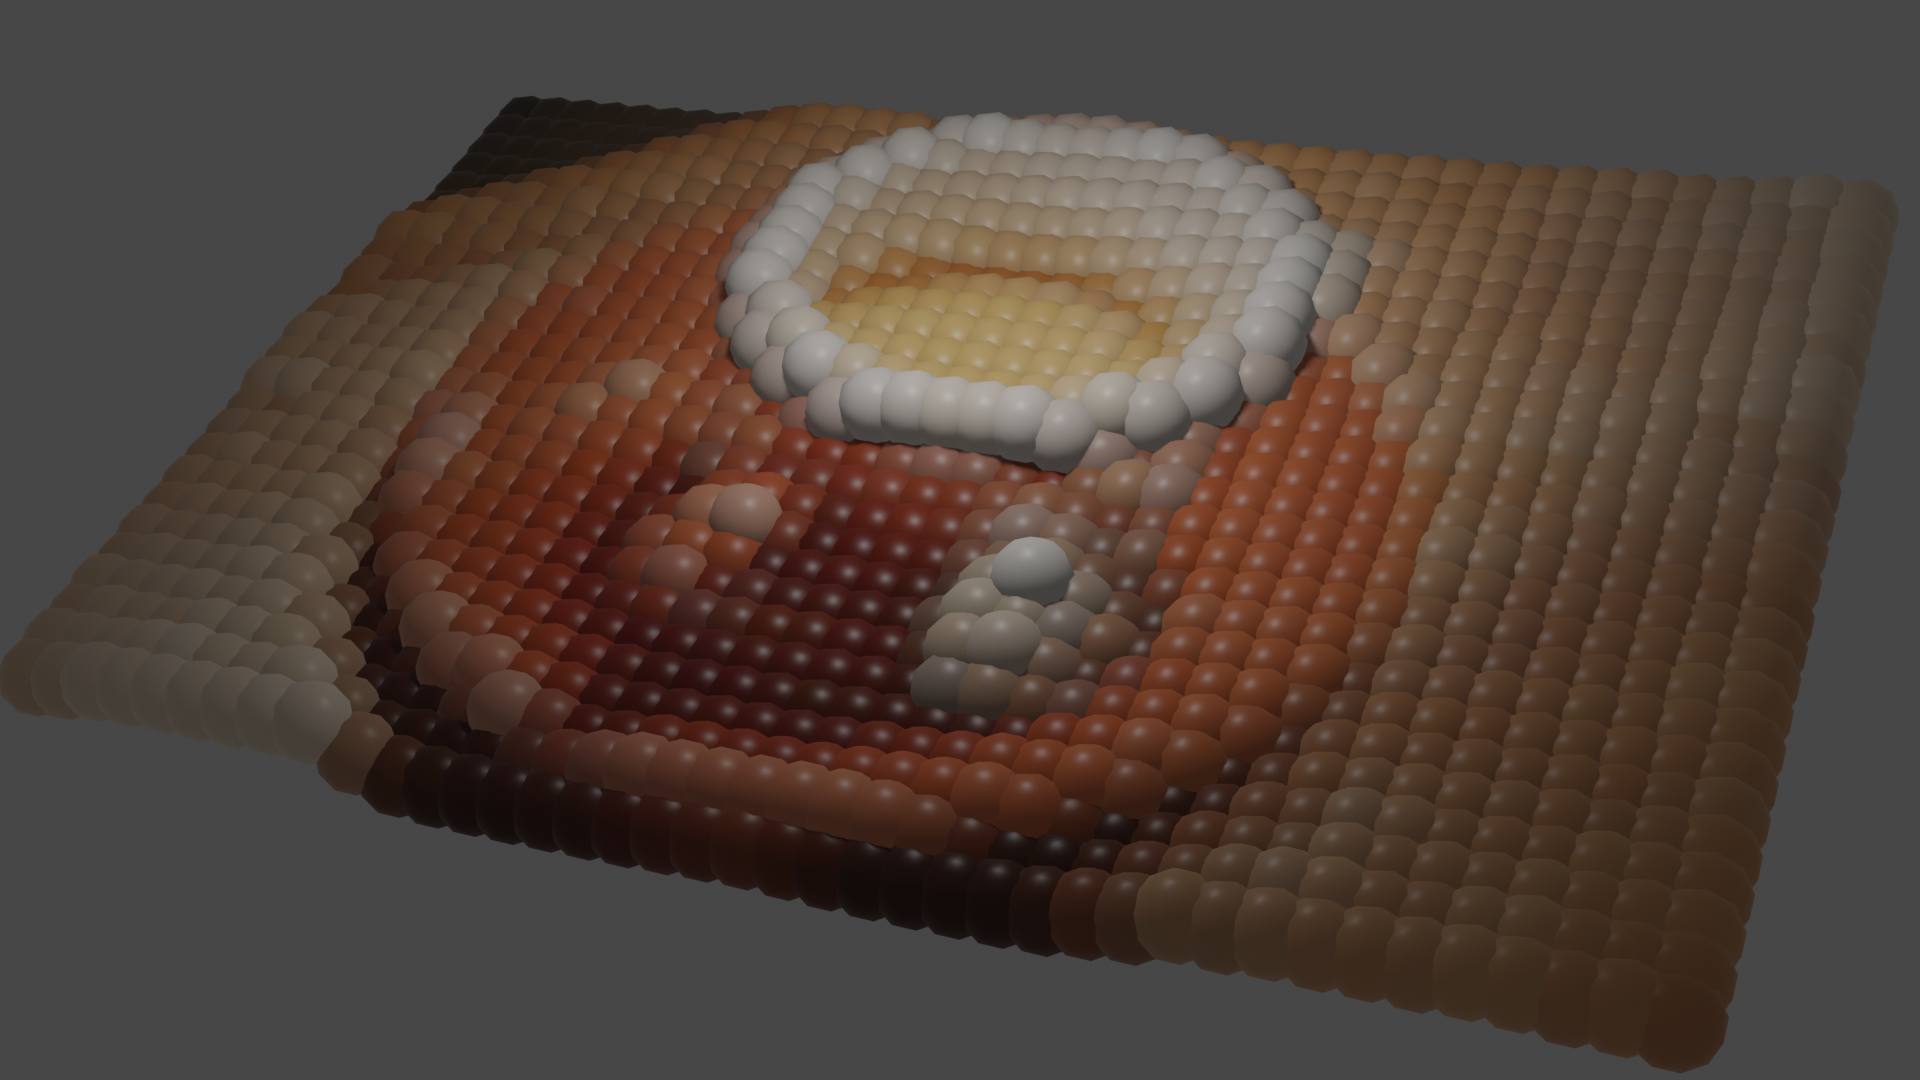

In [7]:
Image('./imagesd/image2scene.png',width=640,height=480)